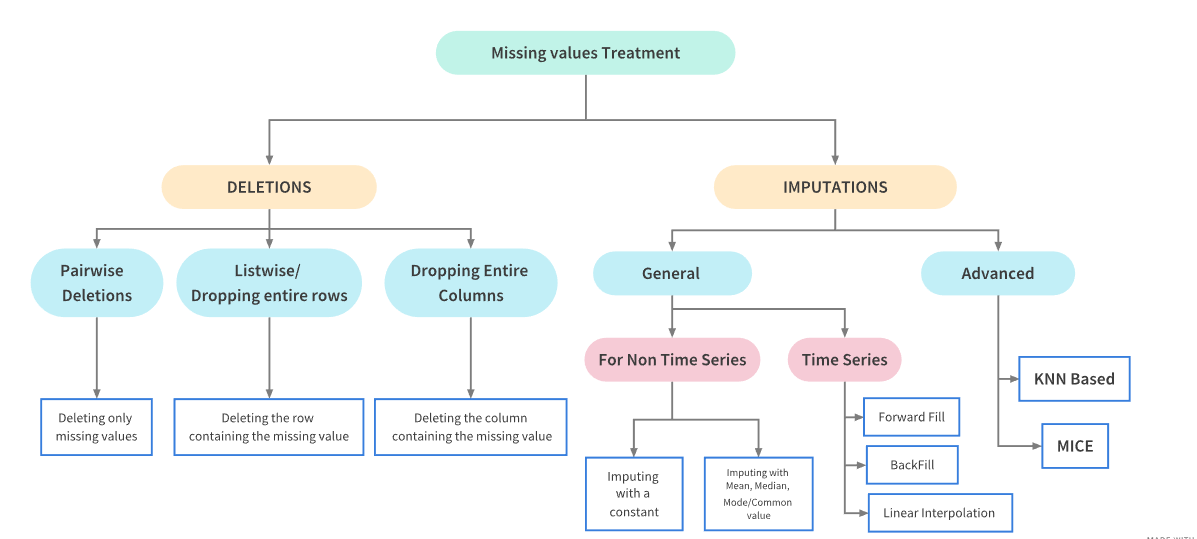

Real world data is messy and often contains a lot of missing values. There could be multiple reasons for the missing values but primarily the reason for missingness can be attributed to

Reason for missing Data
Data doesn't exist
Data not collected due to human error.
Data deleted accidently
Either way we need to address this issue before we proceed with the modeling stuff. It is also important to note that some algorithms like XGBoost and LightGBM can treat missing data without any preprocessing.

In [2]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))

[[ 0.  2.  3.]
 [ 4.  0.  6.]
 [10.  0.  9.]]


In [3]:
!pip install missingno

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
import missingno as msno

In [5]:
import os

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
print('train shape:',train.shape)
print('test shape:',test.shape)

train shape: (891, 12)
test shape: (418, 11)


In [8]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
train['Survived'].value_counts()

,count
Survived,
0,549
1,342


la cai gi day: <Axes.ArtistList of 2 patches>


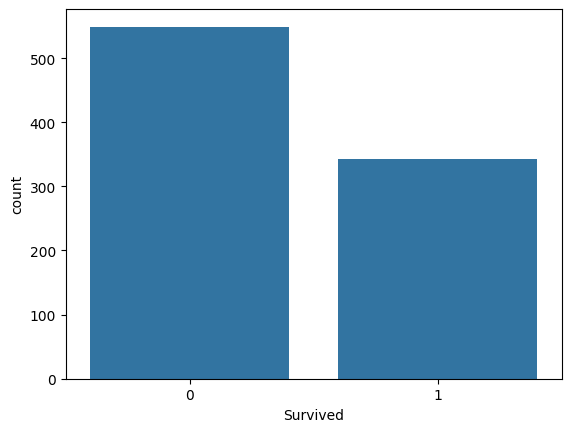

In [11]:
s = sns.countplot(x = 'Survived',data = train)
print('la cai gi day:',s.patches)
size = []

In [12]:
for p in s.patches:
  print(p)
  print(p.get_height())
  print(p.get_x())
  print(p.get_width(),'\n')


Rectangle(xy=(-0.4, 0), width=0.8, height=549, angle=0)
549.0
-0.4
0.8 

Rectangle(xy=(0.6, 0), width=0.8, height=342, angle=0)
342.0
0.6
0.7999999999999999 



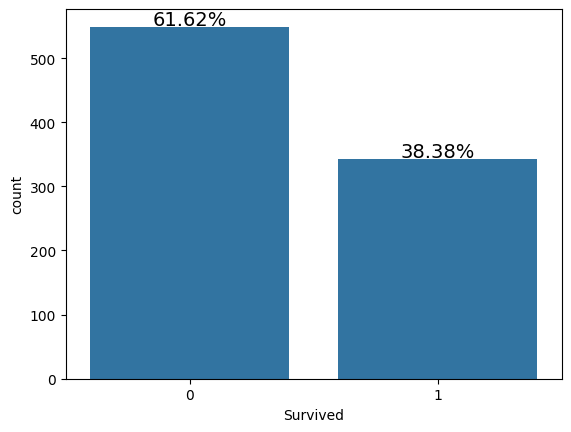

In [13]:
s = sns.countplot(x = 'Survived',data = train)
for p in s.patches:
  height = p.get_height()
  size.append(height)
  s.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center", fontsize=14)


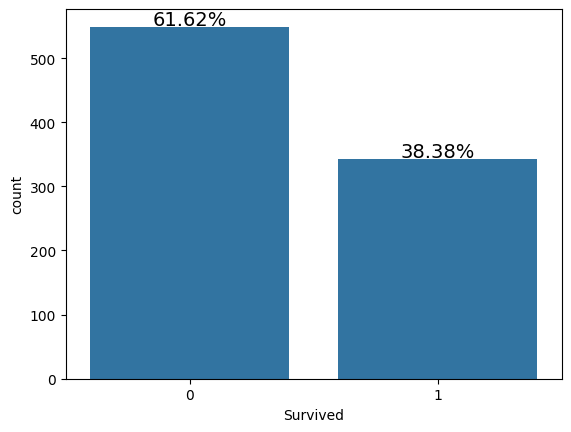

In [14]:
s = sns.countplot(x = 'Survived', data = train)
hung = []
for p in s.patches:
  height = p.get_height()
  hung.append(height)
  s.text(p.get_x()+p.get_width()/2,height + 3,'{:1.2f}%'.format(height/len(train)*100),ha = 'center',fontsize = 14)

detecting a missing value numerically

In [22]:
def missing_values_table(df):
  mis_val = df.isnull().sum()
  mis_val_percent = 100 * df.isnull().sum()/len(df)
  mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
   # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [23]:
train_missing = missing_values_table(train)
train_missing

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [24]:
test_missing = missing_values_table(test)
test_missing

Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


<Axes: >

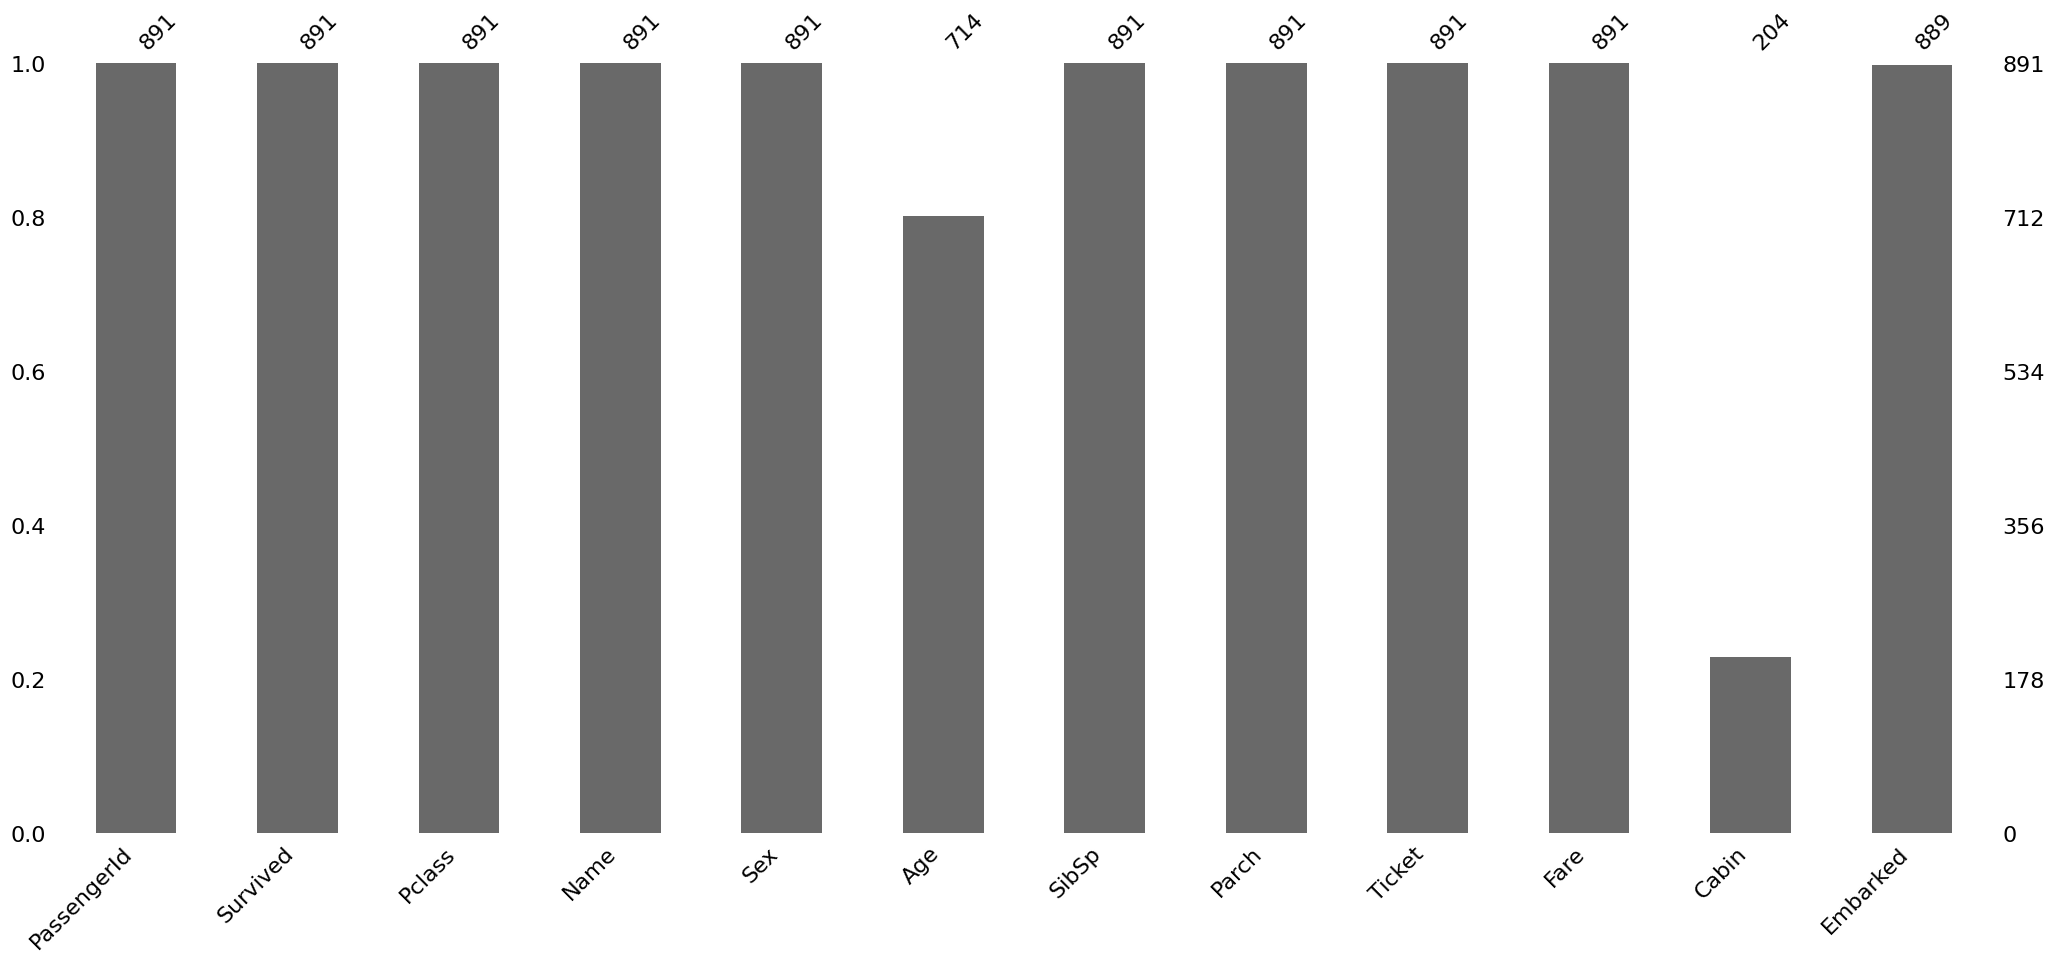

In [25]:
msno.bar(train)

<Axes: >

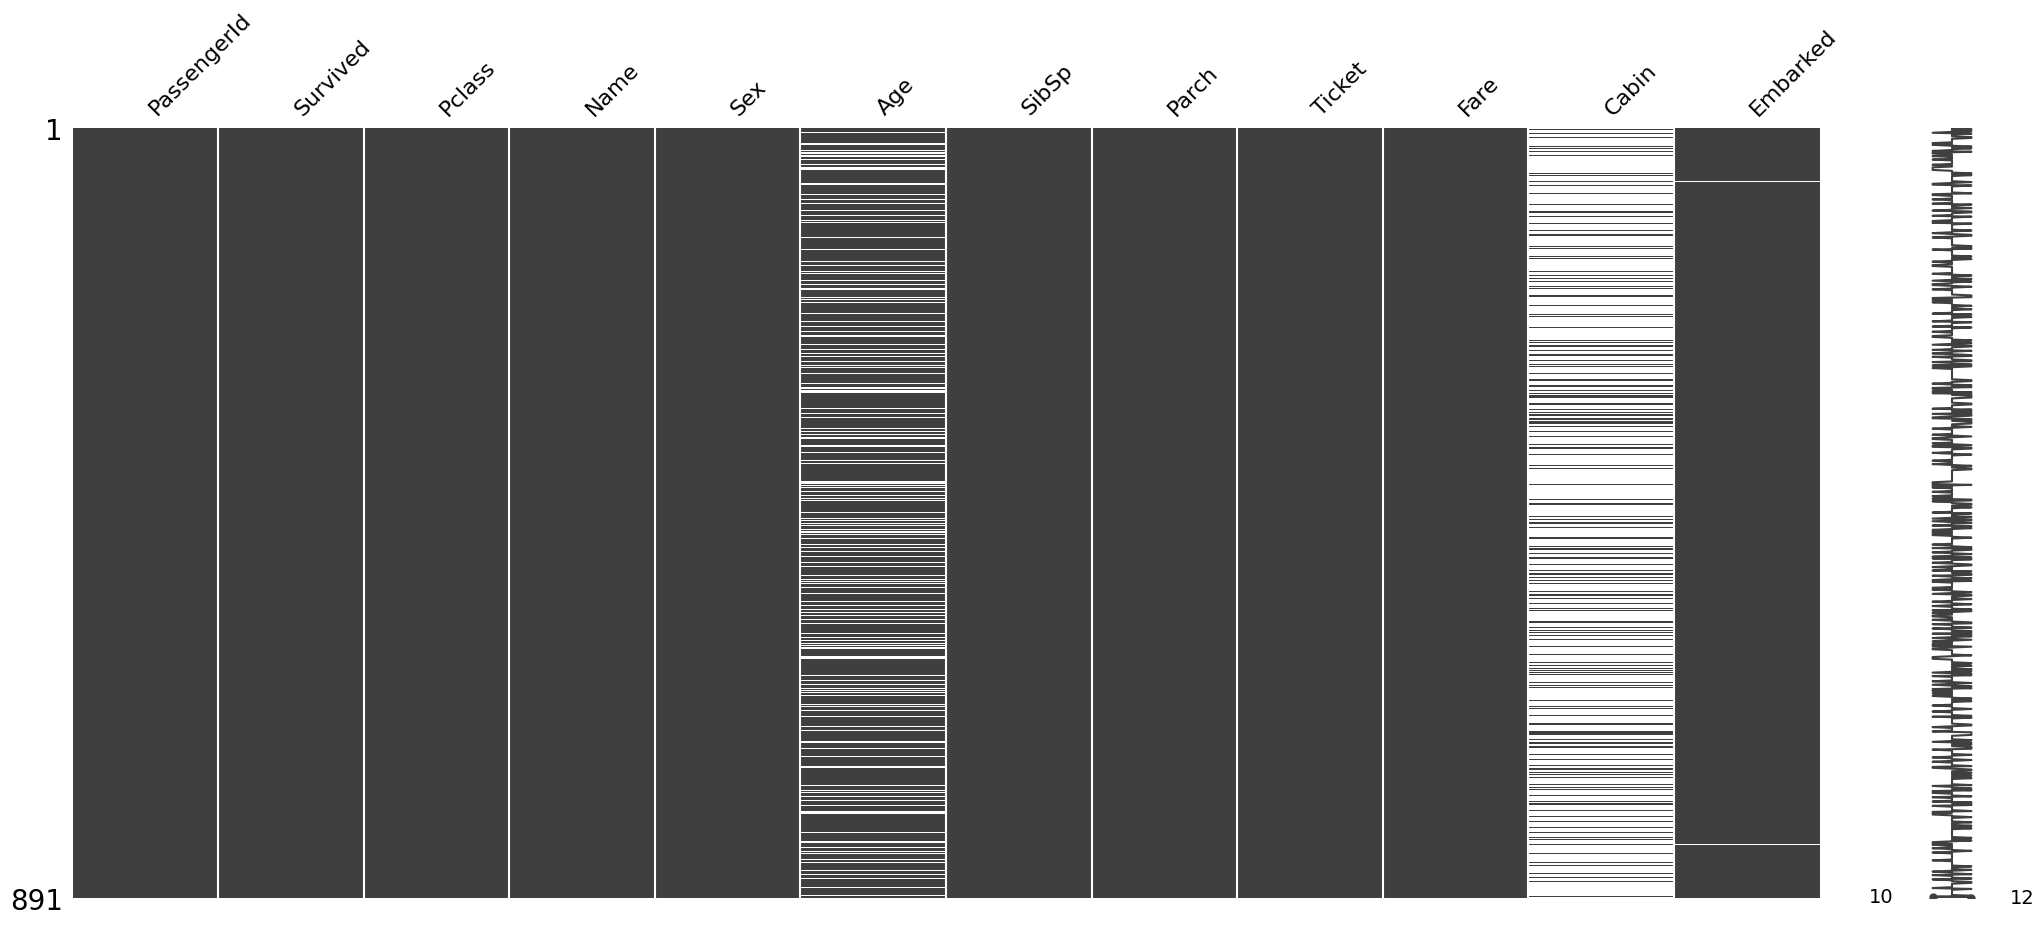

In [26]:
msno.matrix(train)

Reasons for Missing Values
Before we start treating the missing values ,it is important to understand the various reasons for the missingness in data. Broadly speaking, there can be three possible reasons:



source:https://cjasn.asnjournals.org/content/early/2014/02/06/CJN.10141013/tab-figures-data?versioned=true

1. Missing Completely at Random (MCAR)

The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

2. Missing at Random (MAR)

MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

3. Missing Not at Random (MNAR)

Missingness depends on unobserved data or the value of the missing data itself.

All definitions taken from Wikipedia: https://en.wikipedia.org/wiki/Missing_data

Now let us look at nullity matrix again to see if can find what type of missingness is present in the dataset.

<Axes: >

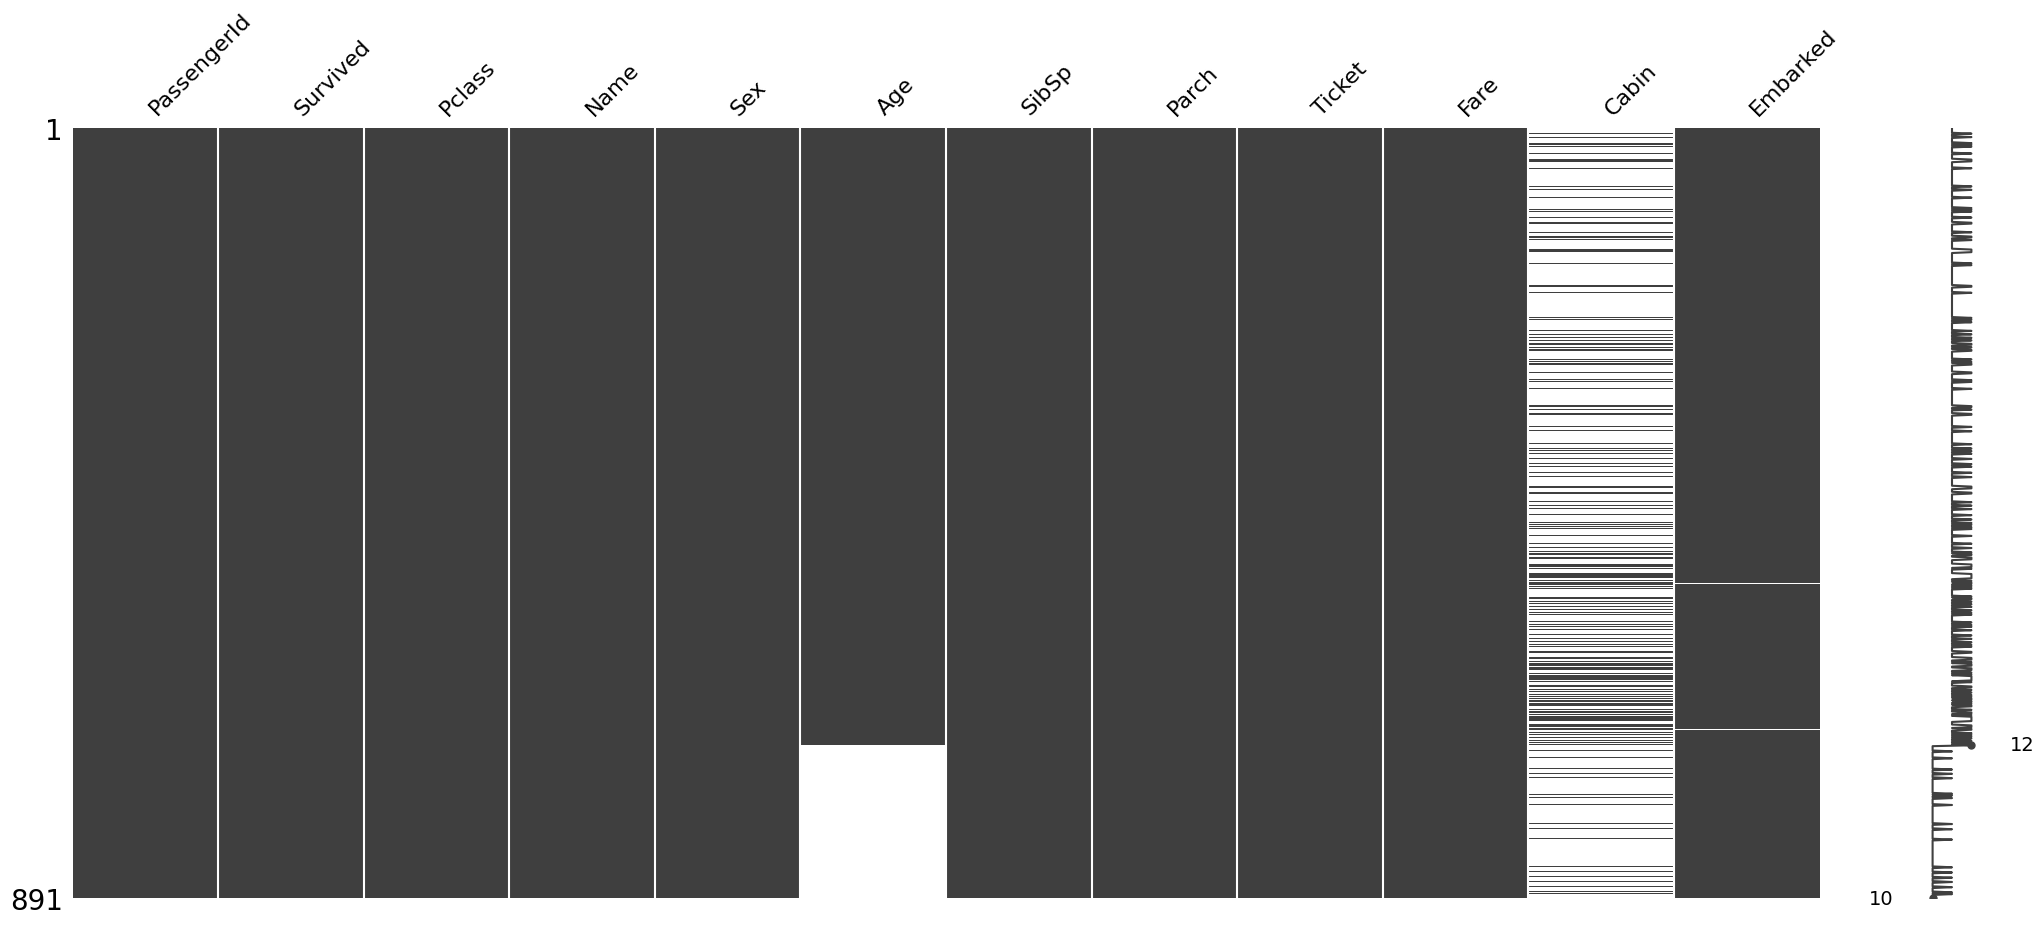

In [29]:
sorted = train.sort_values('Age')
msno.matrix(sorted)

Finding reason for missing data using a Heatmap

<Axes: >

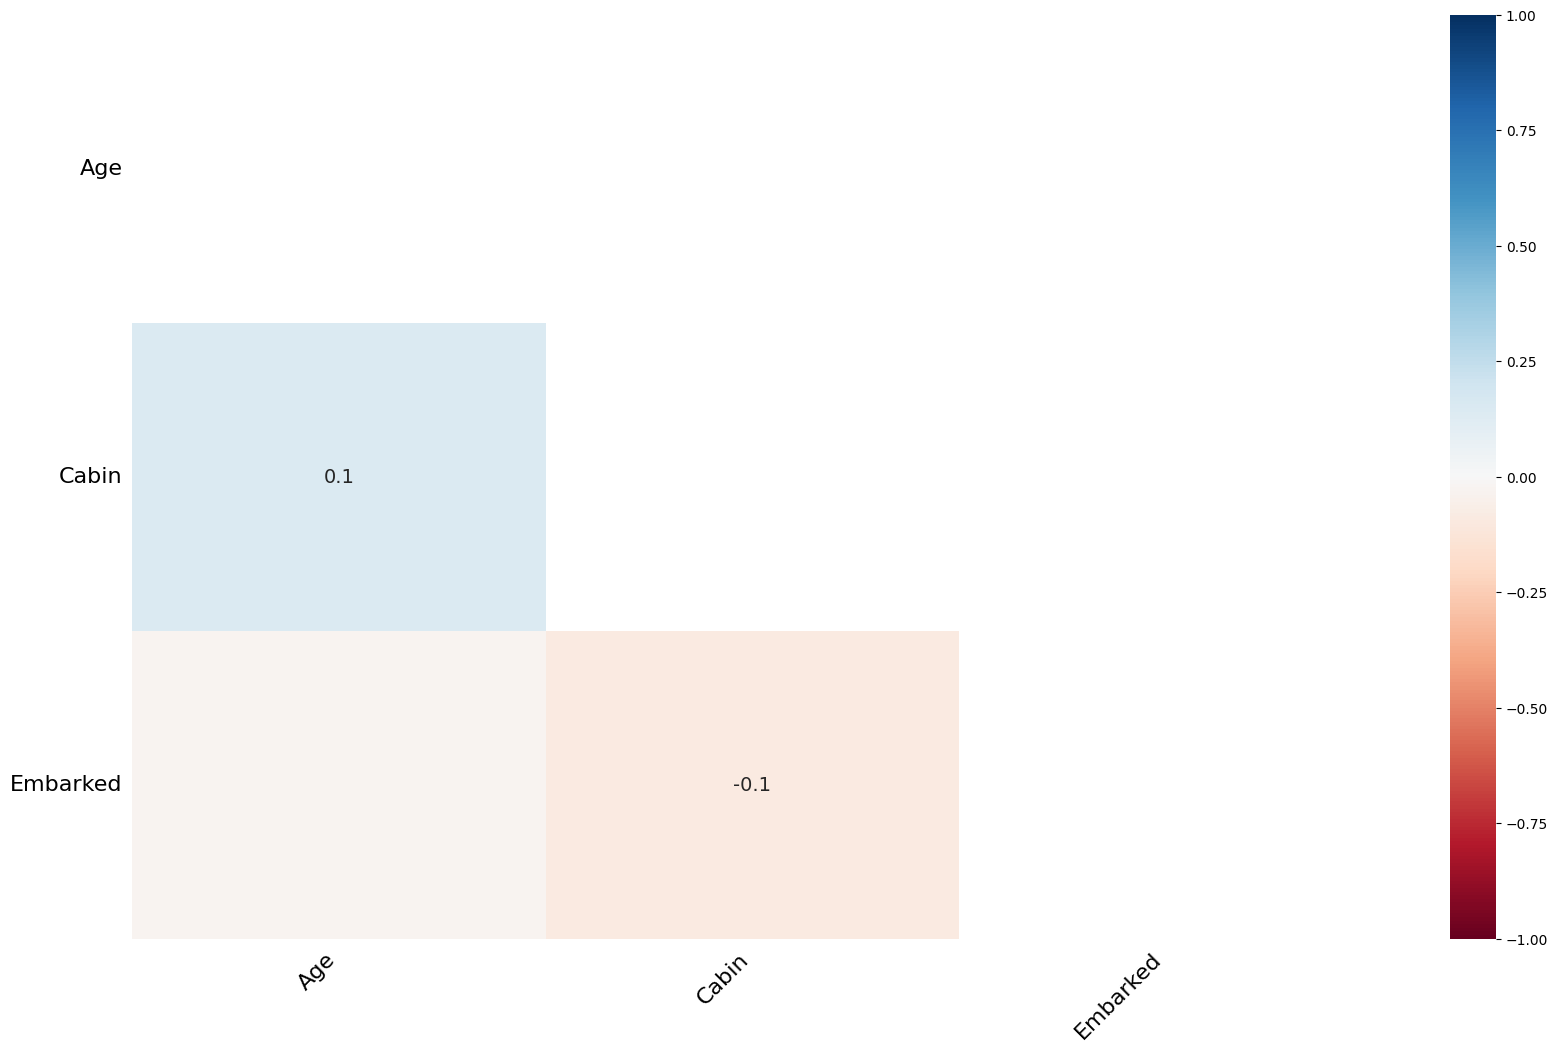

In [30]:
msno.heatmap(train)

The heatmap function shows that there are no strong correlations between missing values of different features. This is good; low correlations further indicate that the data are MAR.

Finding reason for missing data using Dendrogram¶


A dendogram is a tree diagram of missingness. It groups the highly correlated variables together.

<Axes: >

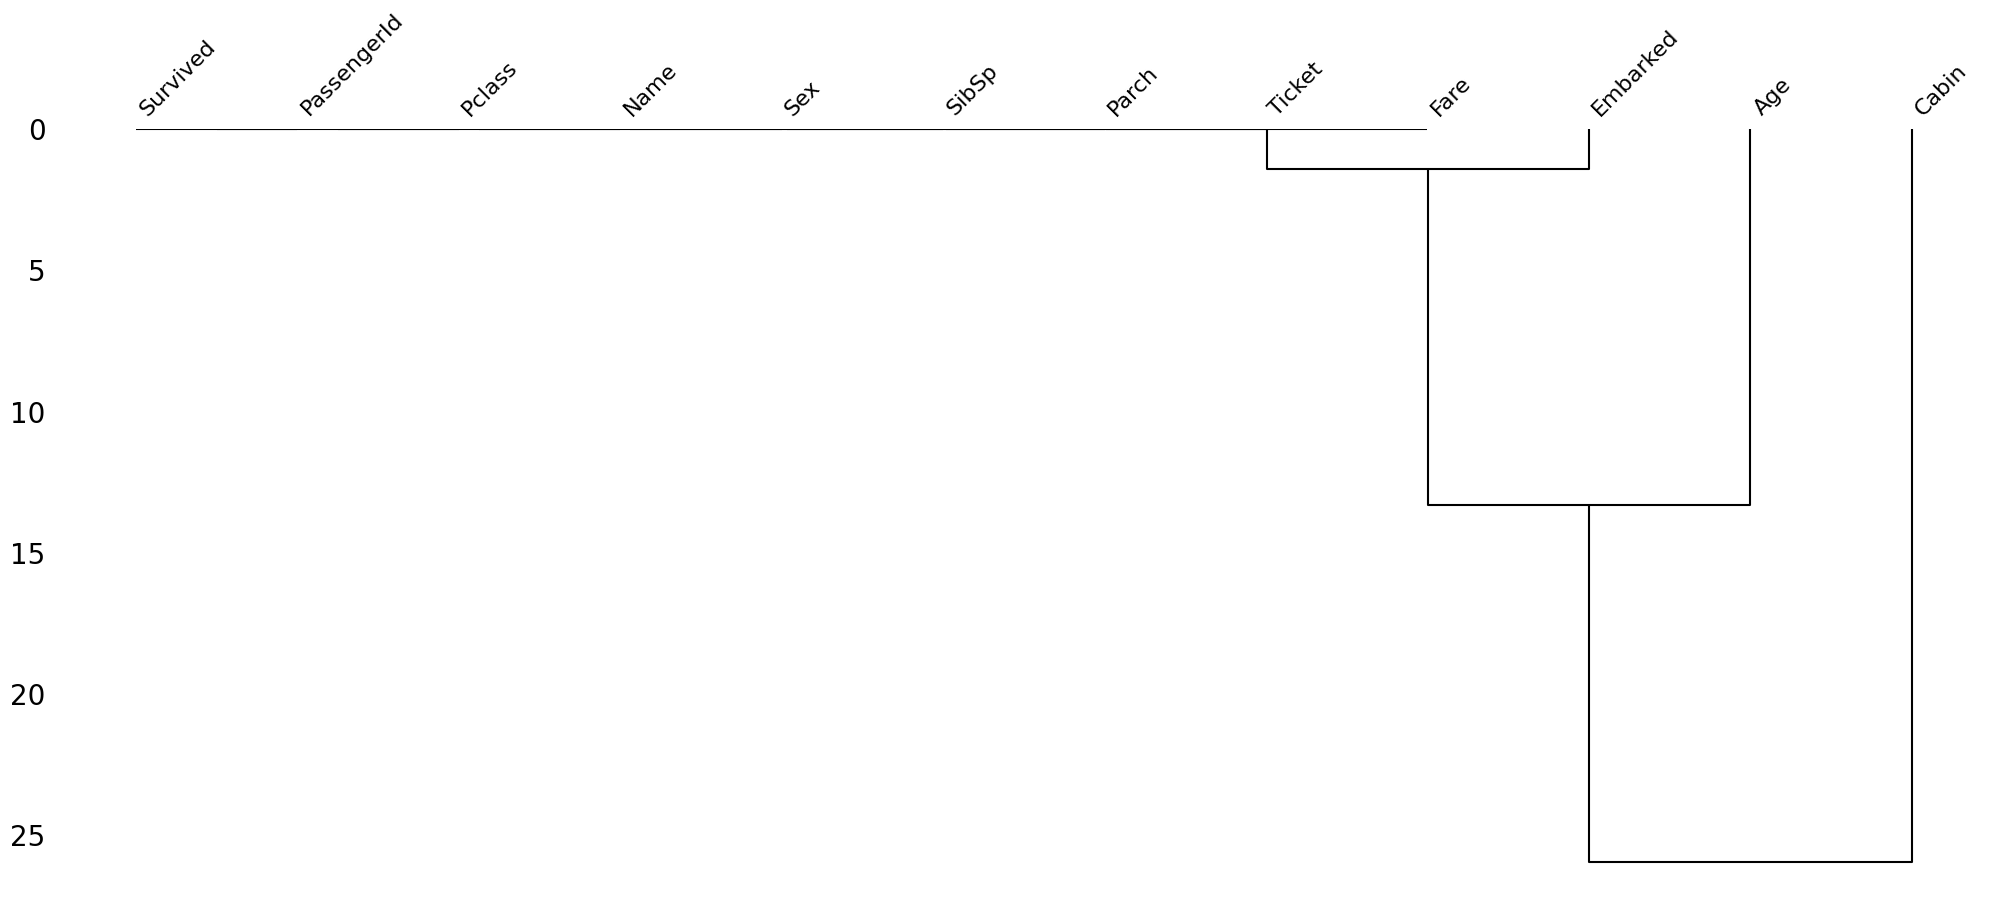

In [31]:
msno.dendrogram(train)

Treating Missing values¶


Pairwise Deletion
Parwise Deletion is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.

In [32]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [33]:
train_1 = train.copy()
train_1['Age'].mean() #pandas skips the missing values and calculates mean of the remaining values.

29.69911764705882

Listwise Deletion/ Dropping rows
During Listwise deletion, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.

In [34]:
#Drop rows which contains any NaN or missing value for Age column
train_1.dropna(subset=['Age'],how='any',inplace=True)
train_1['Age'].isnull().sum()

0

In [36]:
train_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The Age column doesn't have any missing values.A major diadvantage of Listwise deletion is that a major chunk of data and hence a lot of information is lost. Hence, it is advisable to use it only when the number of missing values is very small.

Dropping complete columns
If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.